<a href="https://colab.research.google.com/github/audifarizka/cifar10-showcasing/blob/master/cifar10_best_so_far.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install tensorflow-gpw version 2.1.0

In [0]:
pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 58.0MB/s 
     |████████████████████████████████| 450kB 67.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


Import bunch other libraries, might need later, somehow

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow.keras
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization

Check the keras version

In [0]:
tf.keras.__version__

'2.2.4-tf'

Import the CIFAR10 data via keras.datasets

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


Split the data for training & validating, and for testing

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Check the X_train_full shape and data type

In [0]:
X_train_full.shape

(50000, 32, 32, 3)

In [0]:
X_train_full.dtype

dtype('uint8')

Split the train_full data for validating

In [0]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Check the image data from the CIFAR10 dataset

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


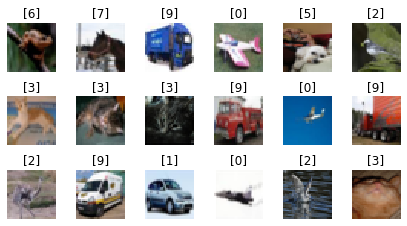

In [0]:
n_rows = 3
n_cols = 6
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Images are plotted with their classes, which are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. index 0 is airplane, 1 is automobile, and so on..

Check the data shapes again

In [0]:
X_valid.shape[:]

(5000, 32, 32, 3)

In [0]:
X_train.shape[:]

(45000, 32, 32, 3)

In [0]:
X_test.shape[:]

(10000, 32, 32, 3)

Change the X data (the matrices) types into floats so they are acceptable into processing later

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

Change the vectors into categorical type

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)

Divide all the values in X datas with 255

In [0]:
X_train /= 255
X_test /= 255
X_valid /= 255

Set up the model. So far this models result the best validation accuracy values.

In [0]:
model = Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                          input_shape=X_train.shape[1:]),
    tf.keras.layers.Conv2D(128, (4, 4), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       131200    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

Compile the model. Use 'categorical crossentropy' as the loss function since we have made the y datas into categorical. Use RMSprop for optimizer

In [0]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=0.0001, epsilon=1e-03),
    metrics = ['accuracy']
)

Utilize data augmentation

In [0]:
image_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

Fit into the X train data

In [0]:
image_gen.fit(X_train)

Fit the model. Epochs is 250, batch size is 16, and workers is 4

In [0]:
history = model.fit(
    image_gen.flow(X_train, y_train, batch_size=16),
    epochs=250,
    validation_data=(X_valid, y_valid),
    workers=4
)

  ...
    to  
  ['...']
Train for 2813 steps, validate on 5000 samples
Epoch 1/250
2813/2813 [==============================] - 46s 16ms/step - loss: 1.8973 - accuracy: 0.3036 - val_loss: 1.5459 - val_accuracy: 0.4392
Epoch 2/250
2813/2813 [==============================] - 39s 14ms/step - loss: 1.6548 - accuracy: 0.3936 - val_loss: 1.4668 - val_accuracy: 0.4792
Epoch 3/250
2813/2813 [==============================] - 39s 14ms/step - loss: 1.5405 - accuracy: 0.4414 - val_loss: 1.3113 - val_accuracy: 0.5338
Epoch 4/250
2813/2813 [==============================] - 39s 14ms/step - loss: 1.4530 - accuracy: 0.4772 - val_loss: 1.2791 - val_accuracy: 0.5556
Epoch 5/250
2813/2813 [==============================] - 39s 14ms/step - loss: 1.3817 - accuracy: 0.5076 - val_loss: 1.1429 - val_accuracy: 0.5924
Epoch 6/250
2813/2813 [==============================] - 39s 14ms/step - loss: 1.3269 - accuracy: 0.5299 - val_loss: 1.1031 - val_accuracy: 0.6140
Epoch 7/250
2813/2813 [=======================

Check the model scores using the test data

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 154us/sample - loss: 0.6138 - accuracy: 0.8126


In [0]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.6137786511898041
Test accuracy: 0.8126


I think it's not a bad scores?

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot the values

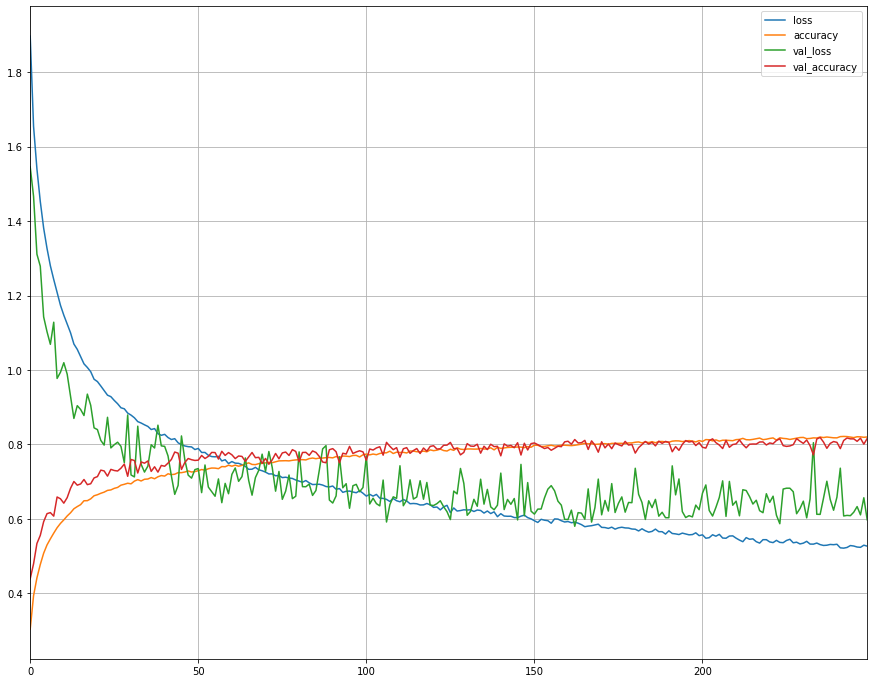

In [0]:
pd.DataFrame(history.history).plot(figsize=(15, 12))
plt.grid(True)
#plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

The validation accuracy and accuracy graphs are following rather closely, therefore the models are not overfitting

Zoom in to the validation accuracy and accuracy graphs

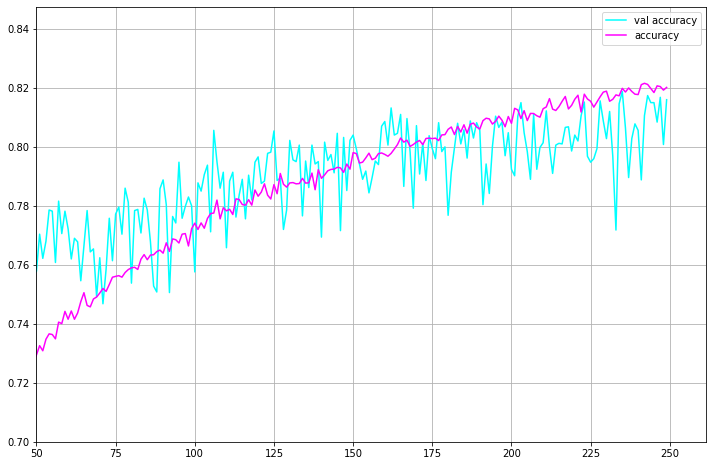

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['val_accuracy'], color='cyan', label='val accuracy')
plt.plot(history.history['accuracy'], color='magenta', label='accuracy')
plt.xlim(left=50)
plt.ylim(bottom=0.7)
plt.grid(True)
plt.legend(loc='best')
plt.show()

Both still follow pretty closely

Use the model to preddict the classes using the X test data

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
len(y_pred)

10000

Check to see the model result

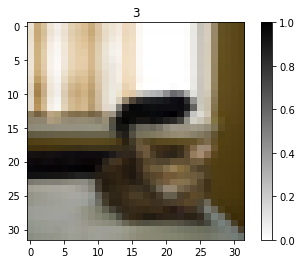

In [0]:
image = X_test[63]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.title(y_pred[63])
plt.show()

It's a picture of a cat, and the prediction result is also of a cat (index 3 is cat)

In [0]:
class_labels = ['airplane', 'automobile', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Let's try to plot a bunch of them:

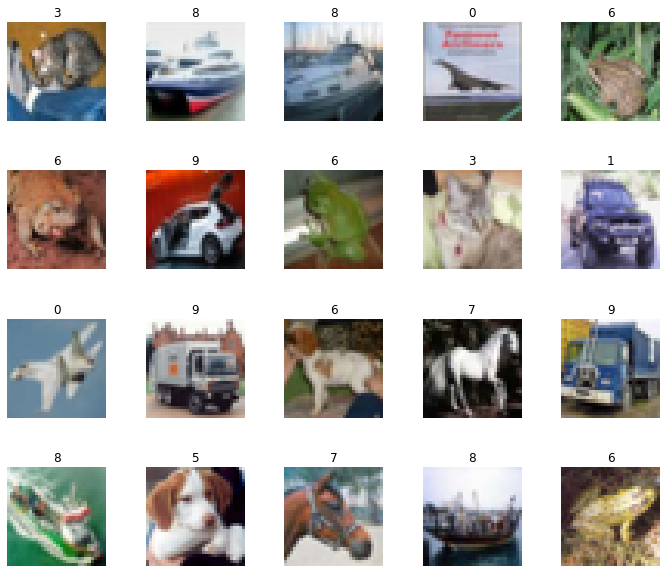

In [0]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(12, 10))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], interpolation="nearest")
        plt.axis('off')
        plt.title(y_pred[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

The results are pretty good? It is stated in the CIFAR10 website that small trucks, like pickup trucks and big trucks are different classes. Small pickup trucks belong to the automobile class, index 1

You can see picture of a white hatchback car is categorized as truck using the model, thus the 20-ish % of the error